In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


### 1. Find out how many males and females participated in the test. 

In [5]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 2. What do you think about the students' parental level of education? 

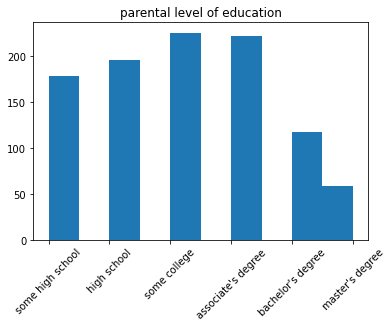

In [7]:
plt.hist(data['parental level of education'])
plt.xticks(rotation=45)
plt.title('parental level of education')
plt.show()

### 3. Who scores the most on average for math, reading and writing based on ● Gender ● Test preparation course 

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [9]:
data.mean()

C:\Users\FISAL\AppData\Local\Temp\ipykernel_1660\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


math score       66.001
reading score    69.195
writing score    68.119
dtype: float64

In [10]:
data[["gender", "math score"]].groupby(["gender", "math score"]).size().reset_index()

,gender,math score,0
0,female,0,1
1,female,8,1
2,female,11,1
3,female,13,1
4,female,18,1
...,...,...,...
148,male,96,1
149,male,97,4
150,male,98,2
151,male,99,1


In [11]:
df = data.groupby(["gender"])[["math score", "reading score", "writing score"]].mean()

In [12]:
df

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [13]:
df2 = data.groupby(["test preparation course"])[["math score", "reading score", "writing score"]].mean()

In [14]:
df2

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### 4. What do you think about the scoring variation for math, reading and writing based on ● Gender ● Test preparation course 

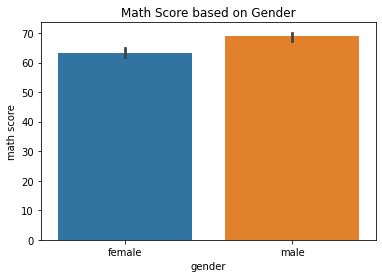

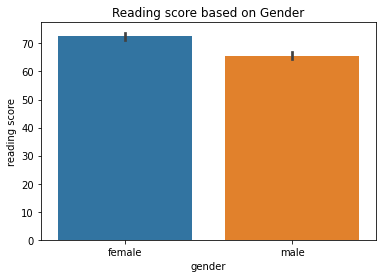

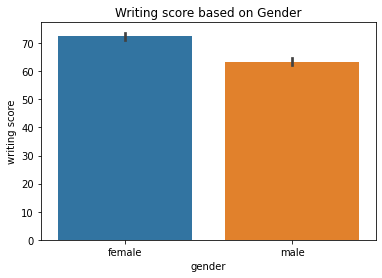

In [15]:
## Barplot : Gender vs Math score

sns.barplot(x="gender", y="math score", data=data)
plt.title("Math Score based on Gender")
plt.show()

## Barplot : Gender vs Reading score

sns.barplot(x="gender", y="reading score", data=data)
plt.title("Reading score based on Gender")
plt.show()

## Barplot : Gender vs Math score

sns.barplot(x="gender", y="writing score", data=data)
plt.title("Writing score based on Gender")
plt.show()

#### Males scored more marks in maths than females whereas females scored more marks in reading and writing compared to males.

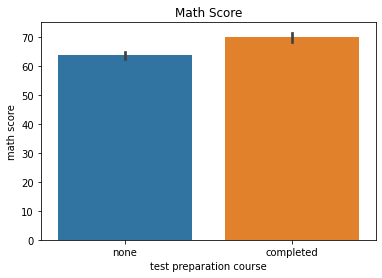

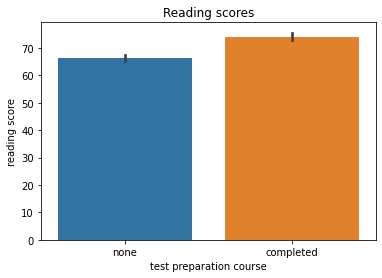

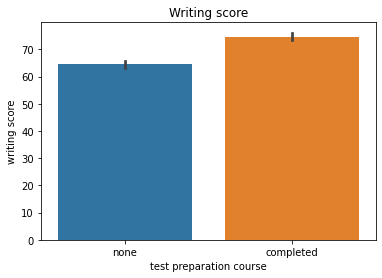

In [16]:
## Barplot : Test Preparation Score vs Math score

sns.barplot(x="test preparation course", y="math score",  data=data)
plt.title("Math Score")
plt.show()

## Barplot : Test Preparation Score vs Reading score

sns.barplot(x="test preparation course", y="reading score", data=data)
plt.title("Reading scores")
plt.show()

## Barplot : Test Preparation Score vs Math score

sns.barplot(x="test preparation course", y="writing score",  data=data)
plt.title("Writing score")
plt.show()

#### It is very clear that those students who had the status completed for test preparation for the course had scored more marks than those who haven't done any prepation

### 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this. 

In [17]:
data["math score"].max()

100

In [18]:
data["math score"].min()

0

In [19]:
data[data["math score"]>66]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
297,female,group B,bachelor's degree,standard,none,67,86,83
298,female,group B,some high school,standard,none,67,89,82
299,female,group B,high school,free/reduced,completed,67,78,79
300,female,group B,high school,free/reduced,completed,67,80,81
301,female,group C,bachelor's degree,standard,none,67,69,75
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [20]:
top= data["math score"].quantile(.75)

In [21]:
top

77.0

In [22]:
data[data["math score"]> top]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [23]:
data[data["math score"]> top].head(25)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
435,female,group D,master's degree,standard,none,78,91,96
436,female,group B,some college,standard,none,79,86,92
437,female,group C,bachelor's degree,standard,completed,79,92,89
438,female,group D,some college,standard,none,79,86,81
439,female,group D,bachelor's degree,standard,none,79,89,89


In [24]:
data[data["math score"]> top].tail(25)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
975,male,group C,bachelor's degree,standard,completed,91,81,79
976,male,group C,master's degree,standard,completed,91,85,85
977,male,group E,associate's degree,free/reduced,completed,91,73,80
978,male,group C,associate's degree,standard,none,92,79,84
979,male,group E,some high school,standard,none,92,87,78
980,male,group C,some college,standard,completed,93,84,90
981,male,group E,some college,free/reduced,none,93,90,83
982,male,group B,some high school,standard,completed,94,86,87
983,male,group C,bachelor's degree,standard,completed,94,90,91
984,male,group E,some high school,standard,none,94,88,78
